In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

## Ion Spacing: SymPy

DOESN'T WORK

## Ion Spacing: SciPy

In [3]:
from scipy.optimize import fsolve, leastsq

In [4]:
def V(u):
    N = len(u)
    return [u[m] - sum([1/(u[m]-u[n])**2 for n in range(m)]) + sum([1/(u[m]-u[n])**2 for n in range(m+1,N)])
               for m in range(N)]

<IPython.core.display.Javascript object>


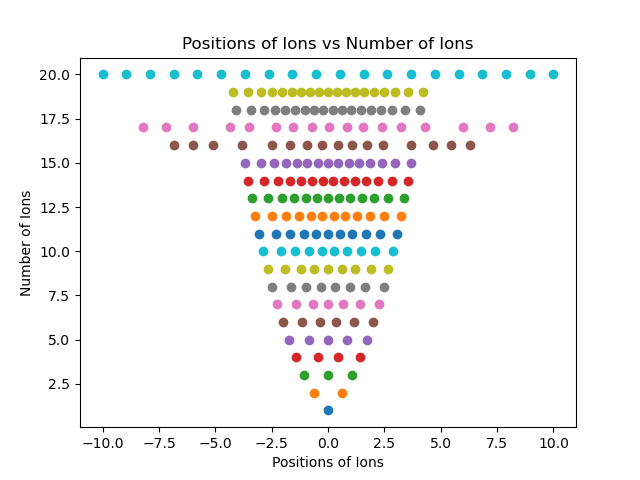

/usr/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [5]:
N = 20
fig, ax = plt.subplots()
for n in range(1, N+1):
    positions = fsolve(V, np.linspace(-10, 10, n))
    ax.scatter(positions, np.ones(n)*n)
ax.set_title('Positions of Ions vs Number of Ions')
ax.set_xlabel('Positions of Ions')
ax.set_ylabel('Number of Ions');

In [6]:
N=15
endpts = np.array([fsolve(V, np.linspace(-10, 10, n))[0] for n in range(1, N+1)])
def f(params):
    a, b = params
    n = np.linspace(1, len(endpts), len(endpts))
    return a*n**b-endpts
endpt_params, _ = leastsq(f, (1,1))
print(f"Extreme positions follow trend of {endpt_params[0]:.3f}*N^{endpt_params[1]:.3f}")

Extreme positions follow trend of -0.481*N^0.765


In [7]:
def calcIonSpacing(N):
    estimated_extreme = -endpt_params[0]*N**endpt_params[1]
    return fsolve(V, np.linspace(-estimated_extreme, estimated_extreme, N))

<IPython.core.display.Javascript object>


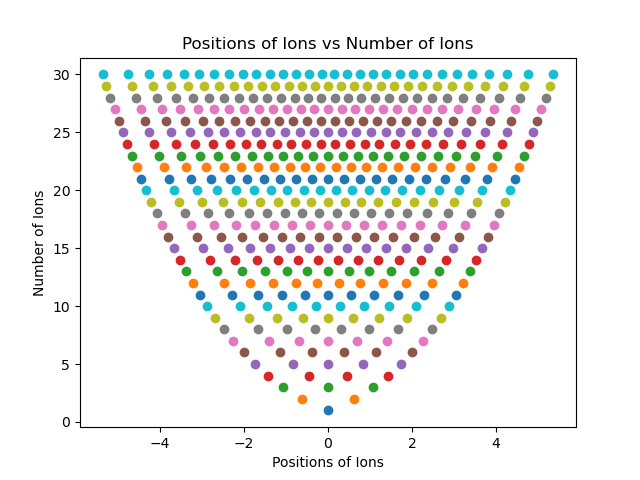

In [8]:
N = 30
fig, ax = plt.subplots()
for n in range(1, N+1):
    positions = calcIonSpacing(n)
    ax.scatter(positions, np.ones(n)*n)
ax.set_title('Positions of Ions vs Number of Ions')
ax.set_xlabel('Positions of Ions')
ax.set_ylabel('Number of Ions');

In [9]:
def calcMinIonSpacing(N):
    positions = calcIonSpacing(N)
    centerindex = len(positions)//2
    return positions[centerindex]-positions[centerindex-1]

<IPython.core.display.Javascript object>


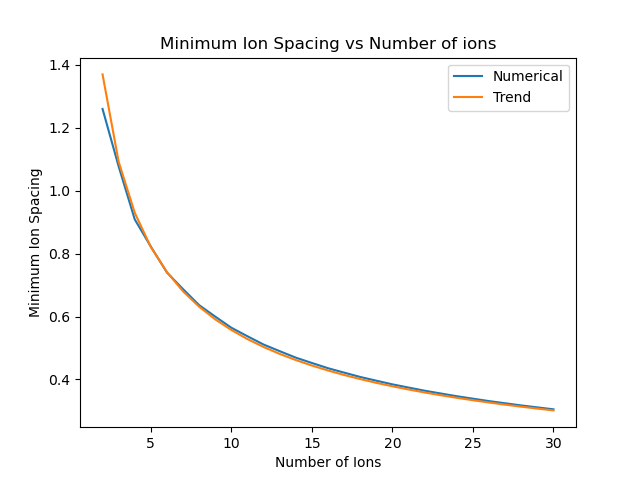

In [10]:
N = 30
minspacings_numerical = []
minspacings_numerical = [calcMinIonSpacing(n) for n in range(2, N+1)]
    
minspacings_trend = [2.018/n**0.559 for n in range(2, N+1)]

fig, ax = plt.subplots()
ax.set_title('Minimum Ion Spacing vs Number of ions')
ax.set_xlabel('Number of Ions')
ax.set_ylabel('Minimum Ion Spacing')
minspacings = []
for n in range(2, N+1):
    positions = fsolve(V, np.linspace(-10, 10, n))
    centerindex = len(positions)//2
    minspacings.append(positions[centerindex]-positions[centerindex-1])
nvals = np.linspace(2, N, N-1)
ax.plot(nvals, minspacings_numerical, label='Numerical')
ax.plot(nvals, minspacings_trend, label='Trend')
ax.legend();

In [11]:
def calcMinFidelity(N, w):
    d = calcMinIonSpacing(N)
    # Assume that w (beam waist) is HWHM of intensity
    sigma = w/np.sqrt(2*np.log(2))
    # Scaled E-field intensity has normal distribution
    # E = np.sqrt(1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*(d/sigma)**2))
    E = np.sqrt(np.exp(-1/2*(d/sigma)**2))
    # Rabi oscillation freq proportional to E-field
    # Fidelity given by ratio (hence inverse) of squared amplitude of excited component in superpos
    fidelity = 1-np.sin(np.pi/2*E)**2
    return fidelity

<IPython.core.display.Javascript object>


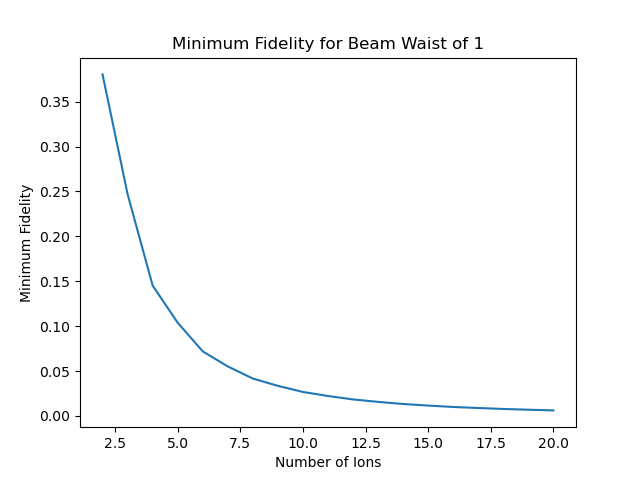

In [12]:
N = 20
n_vals = np.linspace(2, N, N-1)
fidelities = [calcMinFidelity(int(n), 1) for n in n_vals]

fig, ax = plt.subplots()
ax.plot(n_vals, fidelities)
ax.set_title('Minimum Fidelity for Beam Waist of 1')
ax.set_xlabel('Number of Ions')
ax.set_ylabel('Minimum Fidelity');

<IPython.core.display.Javascript object>


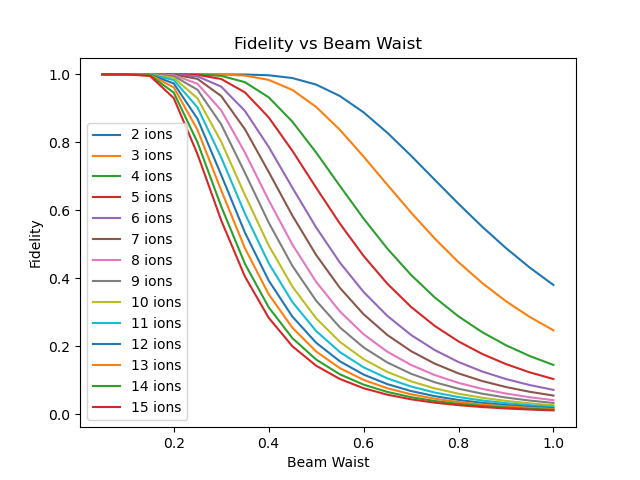

In [13]:
fig, ax = plt.subplots()
ax.set_title('Fidelity vs Beam Waist')
ax.set_xlabel('Beam Waist')
ax.set_ylabel('Fidelity')

N = 15
for n in range(2, N+1):
    w_vals = np.linspace(0.05, 1, 20)
    fidelities = np.array([calcMinFidelity(n, w) for w in w_vals])
    log_fidelities = np.log(fidelities)
    ax.plot(w_vals, fidelities, label=f"{n} ions")
    
ax.legend();